In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import pandas as pd

In [2]:
# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Use transforms.compose method to reformat images for modeling,
# and save to variable all_transforms for later use
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])

In [4]:
# Create Training dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
# Create Testing dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

Files already downloaded and verified


In [6]:
# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


In [7]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [11]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
    #  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [12]:
model = ConvNeuralNet(num_classes)

In [13]:
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

In [14]:
# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

In [15]:
total_step = len(train_loader)
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
    #Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/20], Loss: 1.6588
Epoch [2/20], Loss: 1.7046
Epoch [3/20], Loss: 1.2860
Epoch [4/20], Loss: 1.1643
Epoch [5/20], Loss: 1.3320
Epoch [6/20], Loss: 1.5850
Epoch [7/20], Loss: 1.6248
Epoch [8/20], Loss: 0.9564
Epoch [9/20], Loss: 0.3561
Epoch [10/20], Loss: 1.0446
Epoch [11/20], Loss: 0.7472
Epoch [12/20], Loss: 0.6993
Epoch [13/20], Loss: 0.9318
Epoch [14/20], Loss: 0.9657
Epoch [15/20], Loss: 0.7742
Epoch [16/20], Loss: 0.6455
Epoch [17/20], Loss: 0.7037
Epoch [18/20], Loss: 0.9262
Epoch [19/20], Loss: 0.6007
Epoch [20/20], Loss: 0.4963


In [36]:
type(loss)

numpy.ndarray

In [41]:
loss = loss.tolist()

In [ ]:
nd

In [23]:
import numpy as np

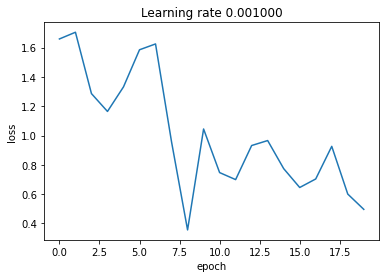

In [47]:
import matplotlib.pyplot as plt
epoch = range(20)
loss = [1.6588, 1.7046,1.2860, 1.1643,1.3320,1.5850,1.6248,0.9564,0.3561,1.0446,0.7472,0.6993,0.9318,0.9657,0.7742,0.6455,0.7037, 0.9262,0.6007, 0.4963]
fig, ax = plt.subplots()
ax.plot(epoch,loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()